In [45]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [46]:
dataset = "superconduct"
n = 20 
no_trees = 100

In [49]:
# Proximal method
result_cs = {}
for depth in range(2,5):
    result_cs[depth] = []
    for C in np.linspace(0.8,1.6,10):
        for lmda_i, lmda in enumerate(10 ** np.linspace(-4,1,8)):
            try:
                f =open(f"../results/cs/{dataset}_n={n}_no_trees={no_trees}_depth={depth}C={C:.3}_lambda={lmda:.6}.json")
                data = json.loads(f.read())
                print(data)
                result_cs[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared']))
            except:
                print(f"Couldn't find results/{dataset}_n={n}_no_trees={no_trees}_depth={depth}C={C:.3}_lambda={lmda:.6}.json")

{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.8, 'lambda': 0.0001, 'k': 8, 'time': 0.4938230514526367, 'equality': False, 'mse': 2361.827173097354, 'true_fourier_norm_squared': 4625.1663631226575, 'computed_fourier_norm_squared': 1470.6277671641164, 'measurements': 55}
{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.8, 'lambda': 0.0005179474679231213, 'k': 8, 'time': 0.4325997829437256, 'equality': False, 'mse': 1120.344311221151, 'true_fourier_norm_squared': 4625.1663631226575, 'computed_fourier_norm_squared': 2179.278419435392, 'measurements': 55}
{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.8, 'lambda': 0.002682695795279727, 'k': 8, 'time': 0.23557400703430176, 'equality': True, 'mse': 9.192673721554043e-05, 'true_fourier_norm_squared': 4625.1663631226575, 'computed_fourier_norm_squared': 4624.362796661049, 'measurements': 55}
{'n': 20, 'no_trees': 100, 'depth': 2, 'C': 0.8, 'lambda': 0.013894954943731374, 'k': 8, 'time': 0.10053753852844238, 'equality': True, 'mse': 0.00246609291655

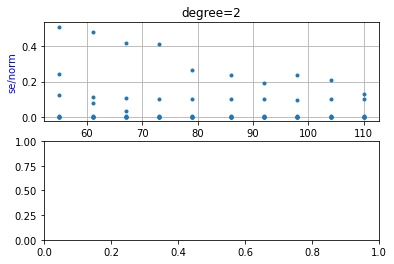

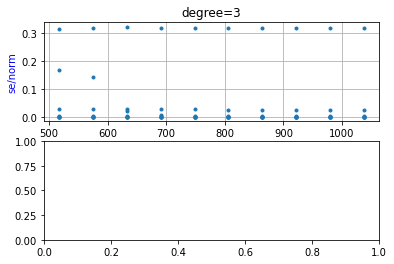

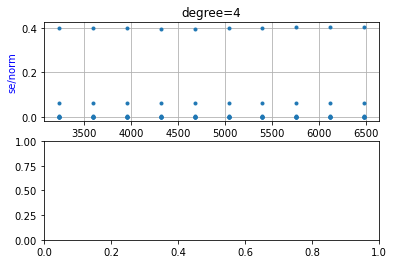

In [44]:
for depth in range(2,5):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_ylabel("se/norm", color="blue")
    ax1.set_xlabel("number of measurments")
    ax1.plot([a[0] for a in result_cs[depth]],[a[1] for a in result_cs[depth]],'.')
    ax1.xaxis.grid()
    ax1.yaxis.grid()
    ax1.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()


In [48]:
print(result_cs[2])

[(55, 0.5106469665456052), (55, 0.2422278947961466), (55, 1.9875336365949996e-08), (55, 5.331901001908436e-07), (55, 1.4303489479452711e-05), (55, 0.00036616283252144816), (55, 0.004936419684716552), (55, 0.12426212396598772), (61, 0.47991768029328247), (61, 0.07693521272744529), (61, 1.967824692360942e-08), (61, 5.278648095842148e-07), (61, 1.4162325150062554e-05), (61, 0.00035996612864095203), (61, 0.004484888841134679), (61, 0.1103849089041539), (67, 0.41649414414918323), (67, 0.03053673847026319), (67, 1.9065754421556795e-08), (67, 5.115192010517231e-07), (67, 1.3721211798992391e-05), (67, 0.0003485165355124326), (67, 0.0043629473646450145), (67, 0.1062263713743633), (73, 0.4145496729234271), (73, 0.0008502775164230754), (73, 1.6346353666728984e-08), (73, 4.3853297752296174e-07), (73, 1.1763862319297152e-05), (73, 0.00031560737816239417), (73, 0.004239603528690443), (73, 0.10208722811457249), (79, 0.26734759252518886), (79, 6.459188842987451e-10), (79, 1.7328508206143998e-08), (79,